In [109]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [110]:
#importing the dataset
df=pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [111]:
print("There are",df.shape[0],"rows and",df.shape[1],"columns in the dataset.")

There are 7752 rows and 25 columns in the dataset.


In [112]:
#Checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [113]:
df.isnull()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7750,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [114]:
df.isnull().sum().sum()

1248

So there are total 1248 null values in the dataset.

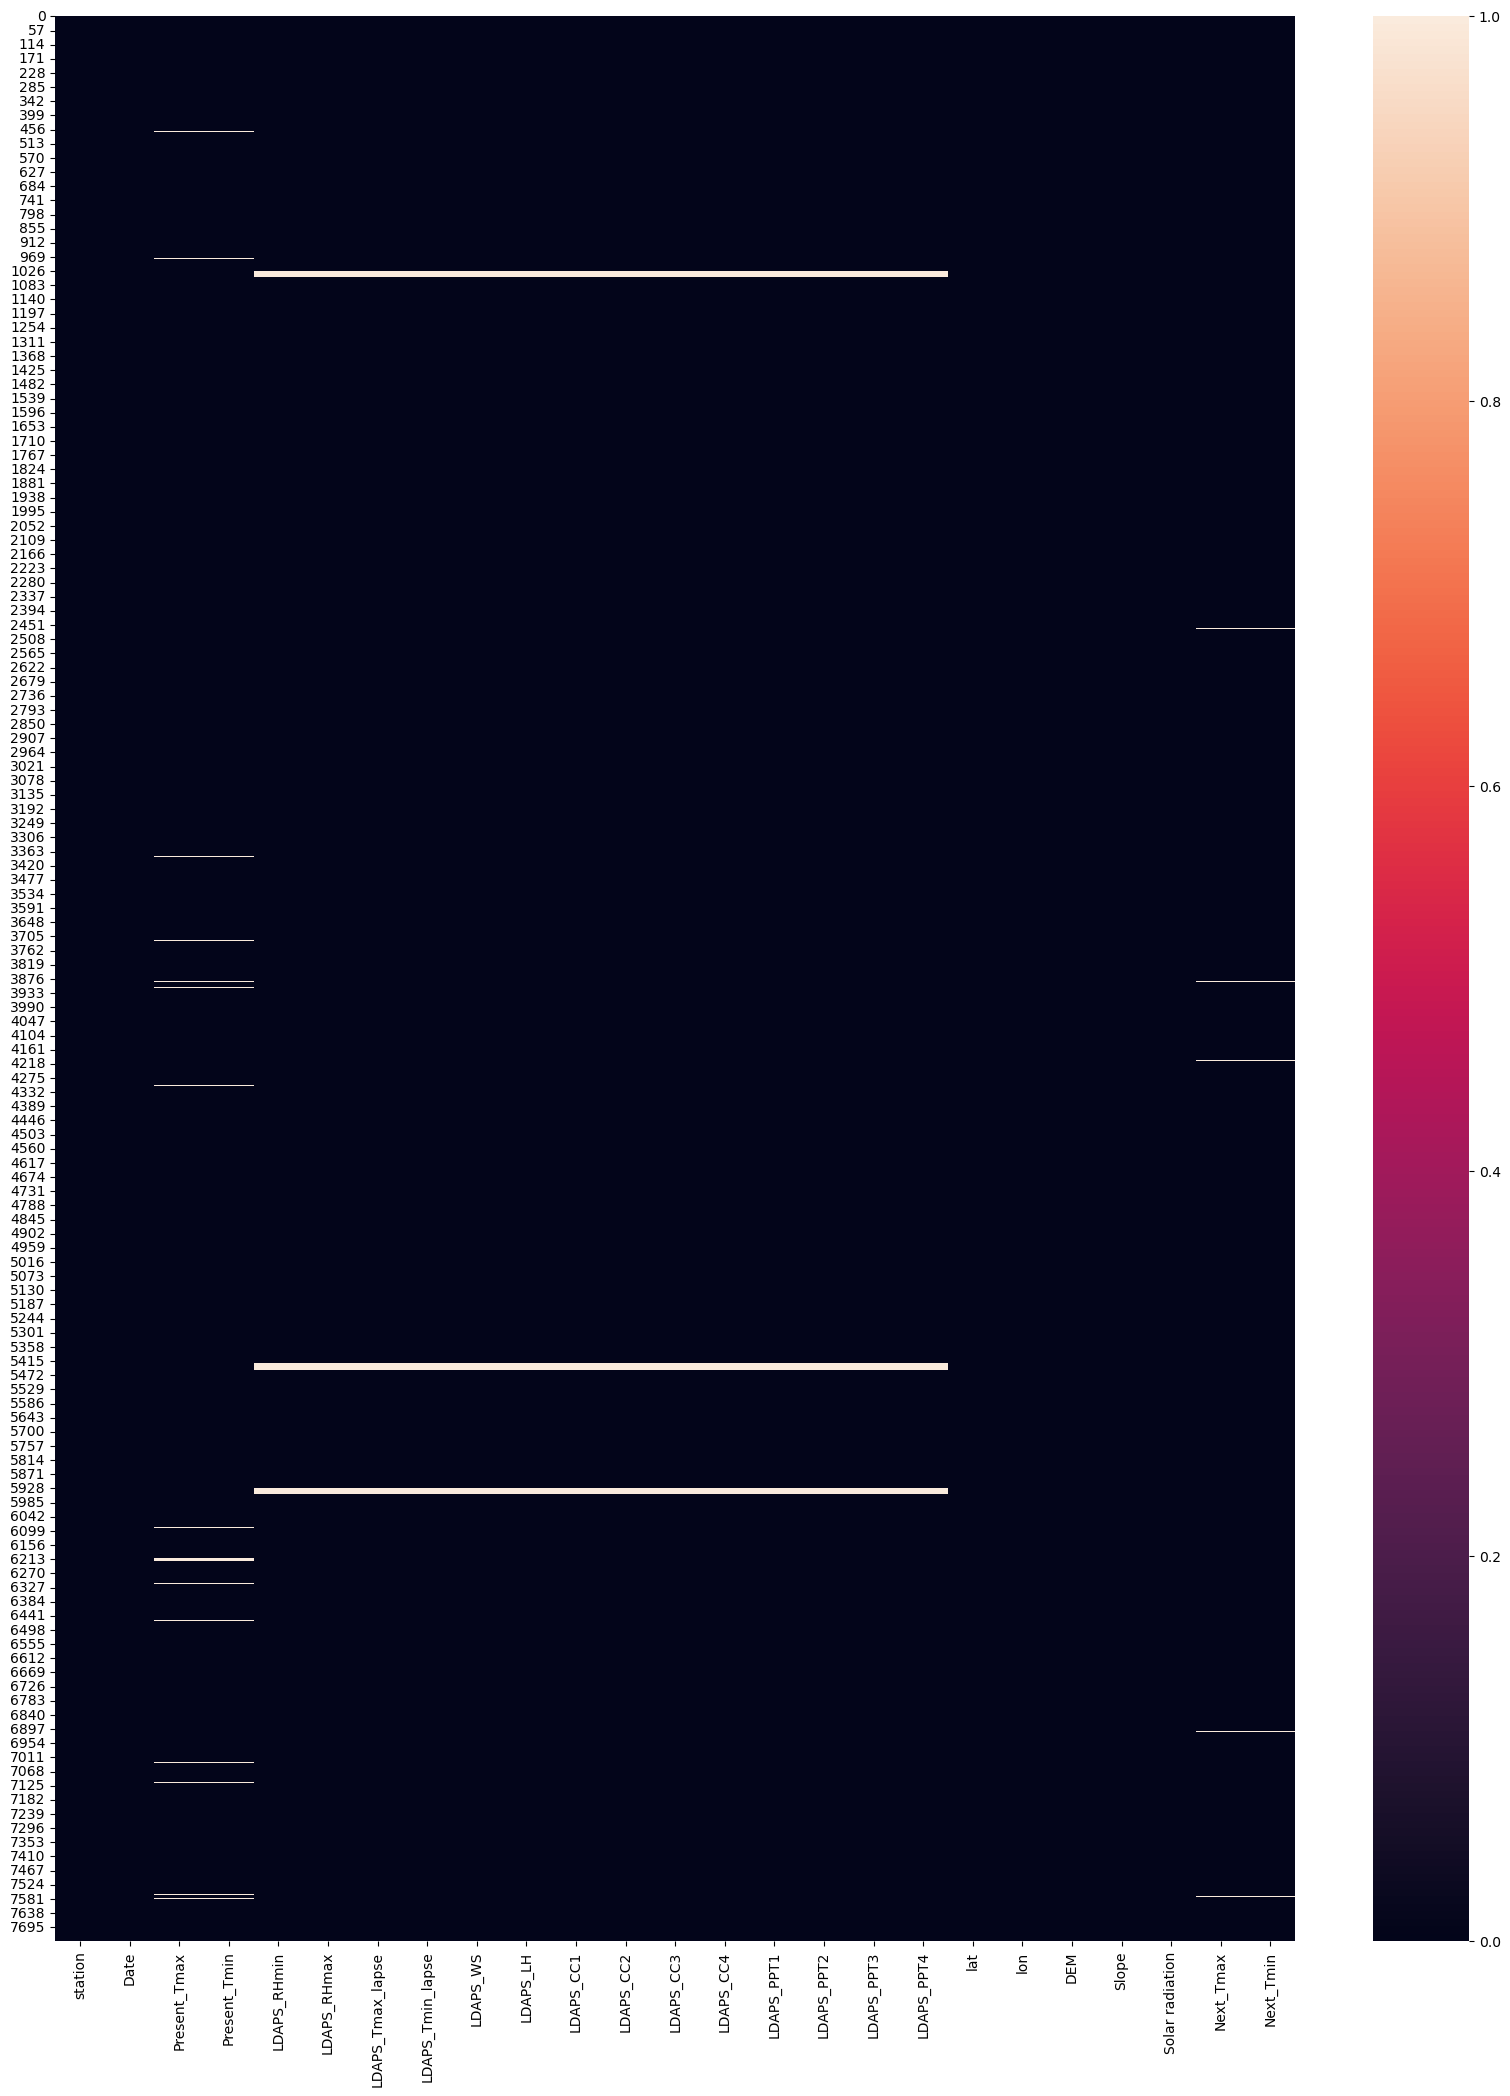

In [115]:
#visualizing the null values
plt.figure(figsize=(20,25))
sns.heatmap(df.isnull())
plt.show()

In [116]:
print("As it is a very large dataset having",df.shape[0],"rows, dropping",df.isnull().sum().sum(),"will not effect the data.")

As it is a very large dataset having 7752 rows, dropping 1248 will not effect the data.


In [117]:
print("Percentage of loss if we drop the null values =",(df.isnull().sum().sum())/df.shape[0]*100)

Percentage of loss if we drop the null values = 16.09907120743034


So we can consider dropping the NaN values.

In [118]:
df_new=df.dropna(inplace=True)

In [119]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now we can see there are no null values in the dataset.

In [120]:
df.shape

(7588, 25)

In [121]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [122]:
#Checking for duplicate values
df.duplicated().sum()

0

# Description

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


As we can see only object type data is Date columns, so if we change it as index column we can predict better.

In [124]:
df.index=df['Date']
df.drop('Date',axis=1,inplace=True)          #Dropped so that there will be no data duplicacy
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
30-06-2013,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
30-06-2013,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
30-06-2013,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
30-06-2013,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [125]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


From the above chart we can say there are no null values in the dataset.

There is skewness present in the dataset.

There are outliers present in the dataset.

# Visualization

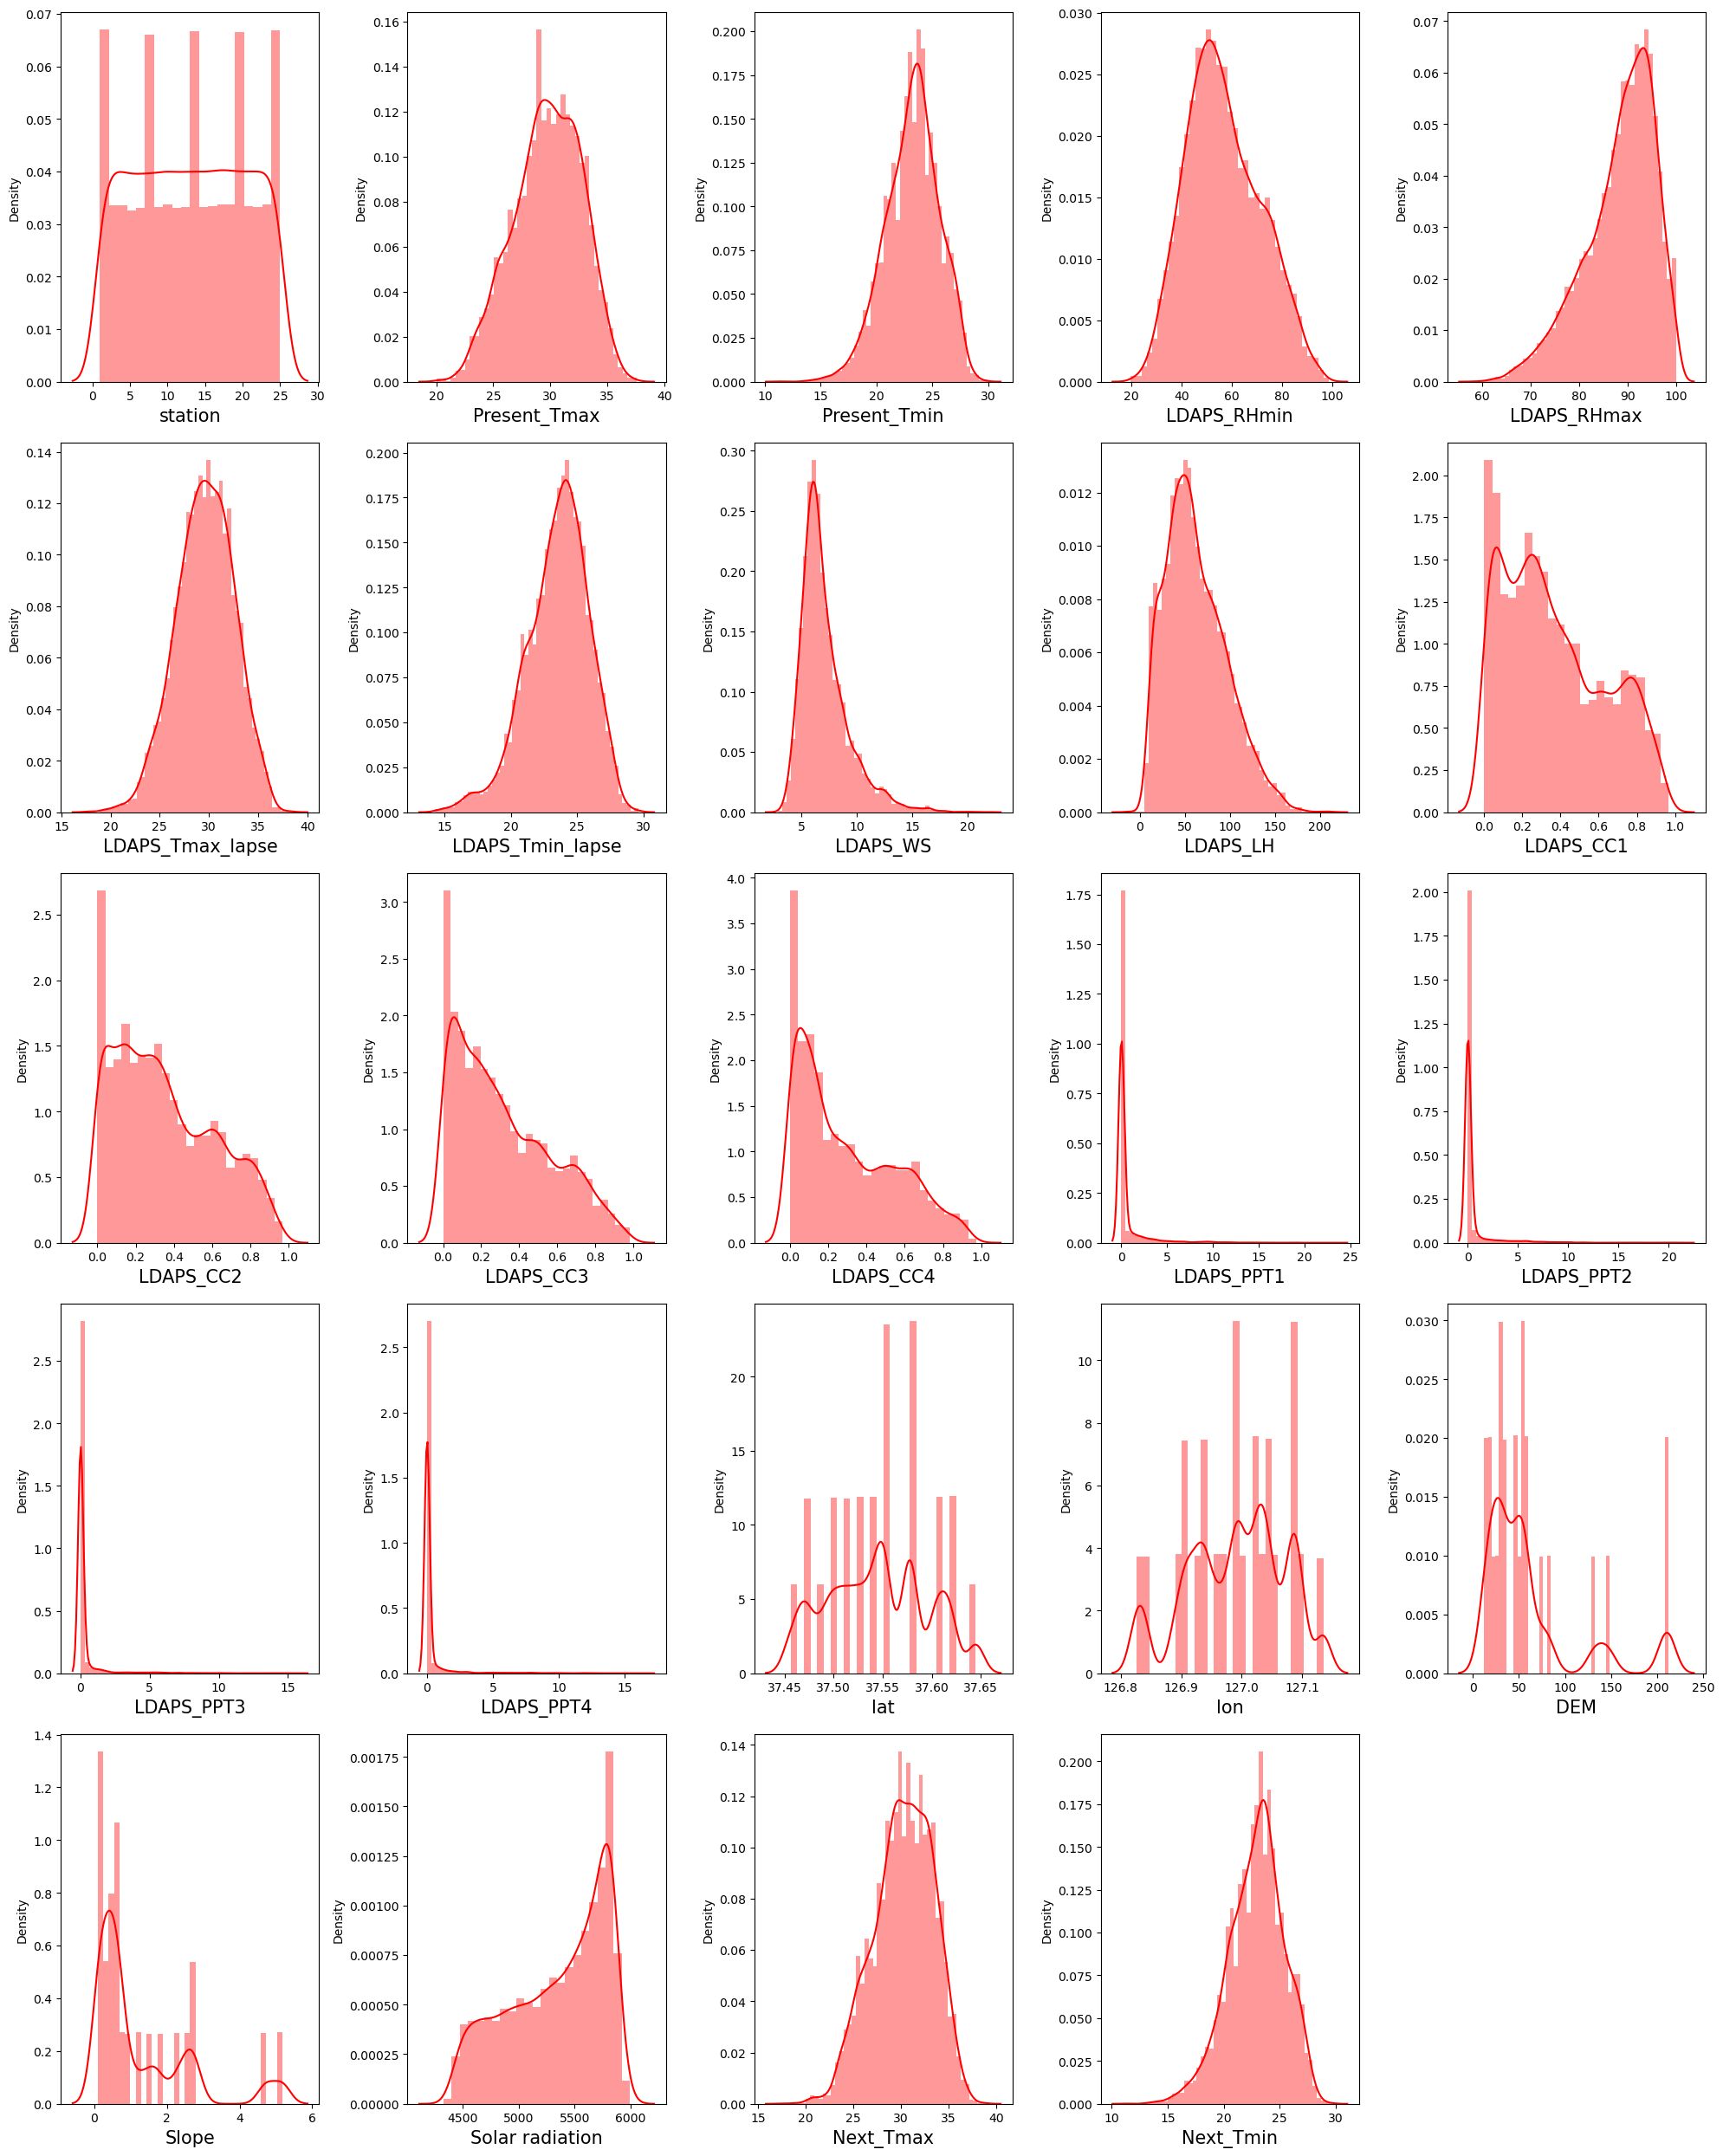

In [126]:
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=25:
        plt.subplot(5,5,p)
        sns.distplot(df[i],color='red')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

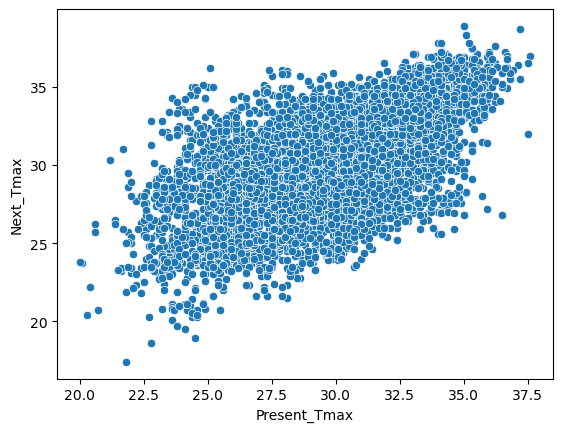

In [127]:
sns.scatterplot(data=df,x='Present_Tmax',y='Next_Tmax',palette='Setr_2')

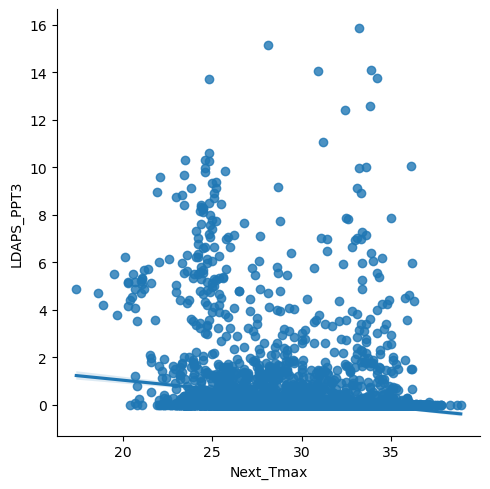

In [128]:
sns.lmplot(data=df,y='LDAPS_PPT3',x='Next_Tmax',palette='pink')

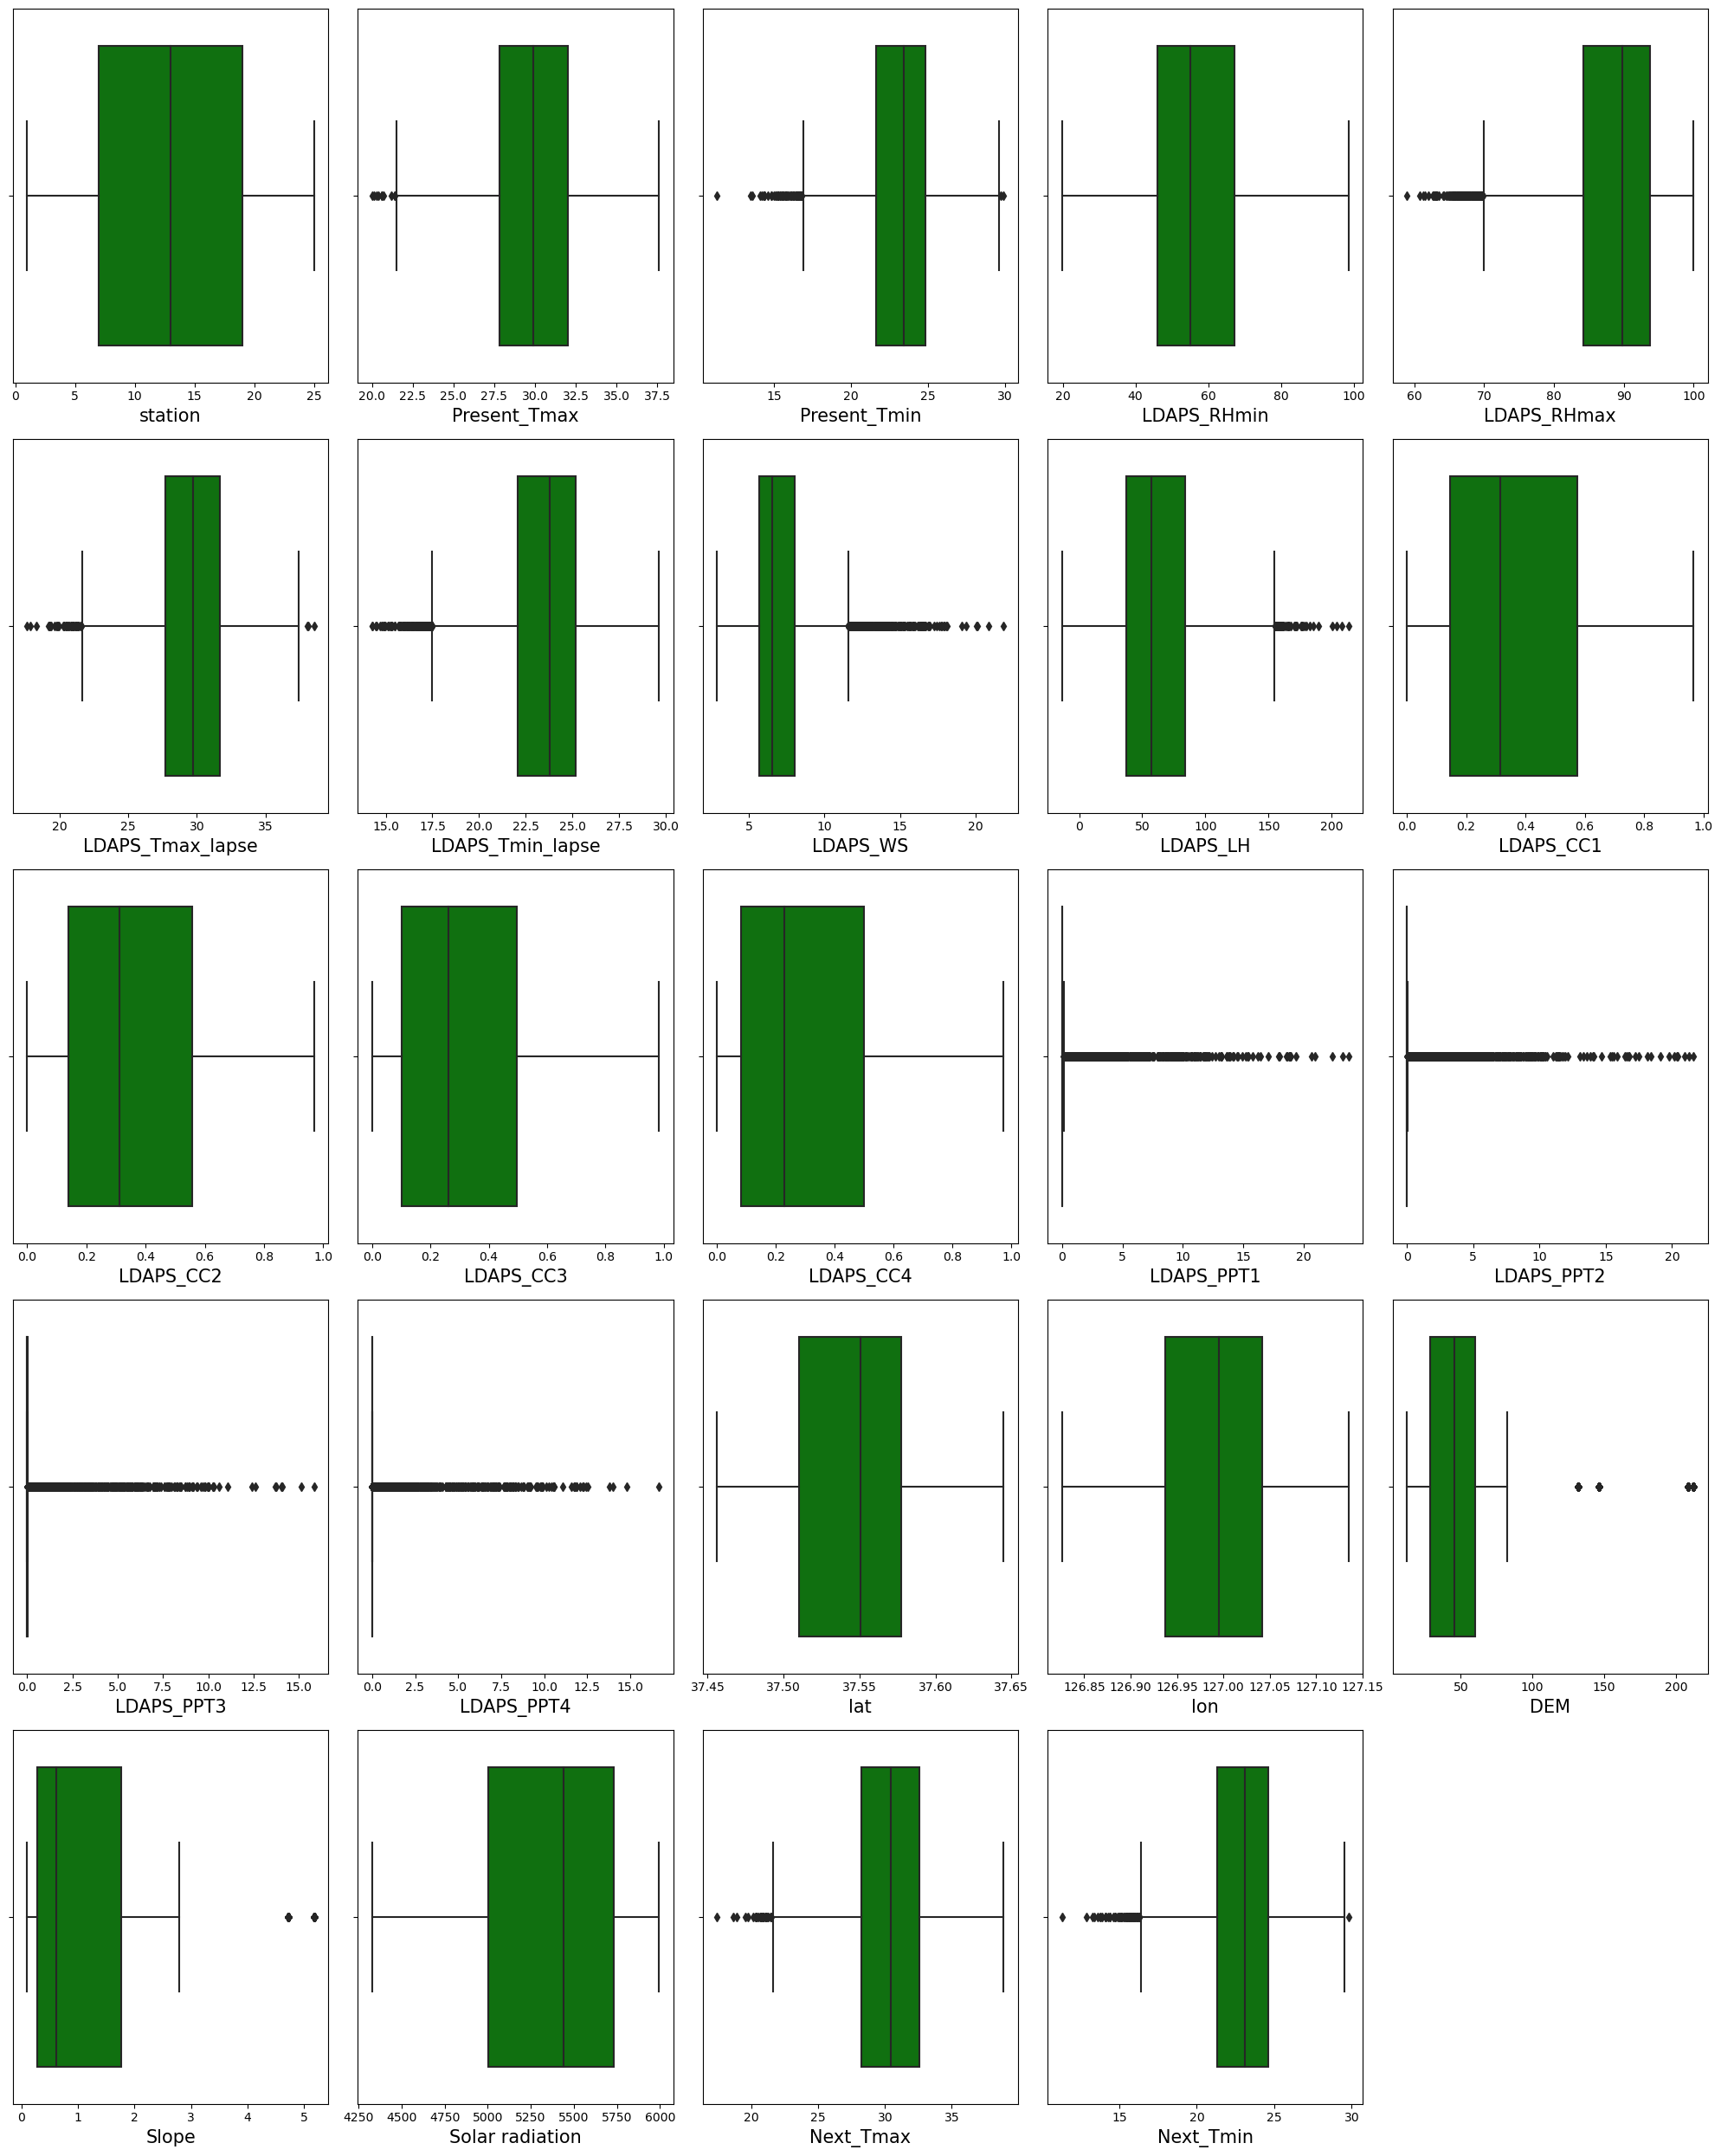

In [129]:
#Outliers Detection
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=25:
        plt.subplot(5,5,p)
        sns.boxplot(df[i],color='green')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

we can see there are lots of outliers present in the dataset. As our target columns are 'Next_Tmax' and 'Next_Tmin',apart from these two columns we will remove outliers from other columns.

In [130]:
#Removing outliers
from scipy.stats import zscore
outliers=df.iloc[:,0:-2]
z=np.abs(zscore(outliers))
z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
Date,,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.664607,0.353318,0.748029,0.104660,0.382768,0.525269,0.215525,0.126423,0.206603,0.513123,...,0.660441,0.305589,0.275777,0.239969,0.224971,1.186076,0.005302,2.769091,1.111162,1.510565
30-06-2013,1.526052,0.725138,0.664721,0.305052,0.311697,0.078334,0.223368,0.644133,0.313359,0.545304,...,0.673074,0.305589,0.275777,0.239969,0.224971,1.186076,0.512280,0.315828,0.543220,1.222997
30-06-2013,1.387498,0.624033,0.043400,0.549344,0.609425,0.160080,0.449896,0.439100,1.244497,0.606944,...,0.616249,0.305589,0.275777,0.239969,0.224971,0.650626,0.840503,0.526719,0.723891,1.209602
30-06-2013,1.248943,0.758840,0.085054,0.103573,1.128335,0.028710,0.079238,0.663353,0.096026,0.580143,...,0.647336,0.305589,0.275777,0.239969,0.224971,1.987268,0.386040,0.298272,0.928888,1.194265
30-06-2013,1.110389,0.556630,0.539758,0.037665,0.249244,0.171981,0.010803,0.624327,1.349989,0.827872,...,0.506152,0.305589,0.275777,0.239969,0.224971,0.117159,1.812547,0.494848,0.549485,1.200286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-08-2017,1.106481,2.240616,2.247578,2.190405,1.402898,0.614083,2.223667,0.225479,1.569844,1.203497,...,1.159890,0.305589,0.275777,0.239969,0.224971,0.117159,0.613271,0.655747,0.500966,2.065599
30-08-2017,1.245036,2.442826,2.414195,1.820788,0.648815,0.990460,2.432415,0.609132,0.583486,1.151793,...,1.107407,0.305589,0.275777,0.239969,0.224971,0.686016,1.193973,0.735482,0.820711,2.098689
30-08-2017,1.383590,2.173212,2.539157,2.050081,1.318376,1.110333,2.021883,0.434188,0.283984,1.290699,...,1.177177,0.305589,0.275777,0.239969,0.224971,0.150566,1.267697,0.852919,0.804538,2.095175


In [131]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [132]:
df_new=df[(z<3).all(axis=1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
30-06-2013,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
30-06-2013,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
30-06-2013,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
30-06-2013,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-08-2017,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
30-08-2017,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
30-08-2017,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1


Lets check data loss after removing outliers.

In [133]:
print("Percentage of data loss =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Percentage of data loss = 11.017395888244597


Data loss is 11%, which is acceptable as it is a big dataset. So lets continue with the new dataset.

In [134]:
df=df_new
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
30-06-2013,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
30-06-2013,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
30-06-2013,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
30-06-2013,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


# Skewness

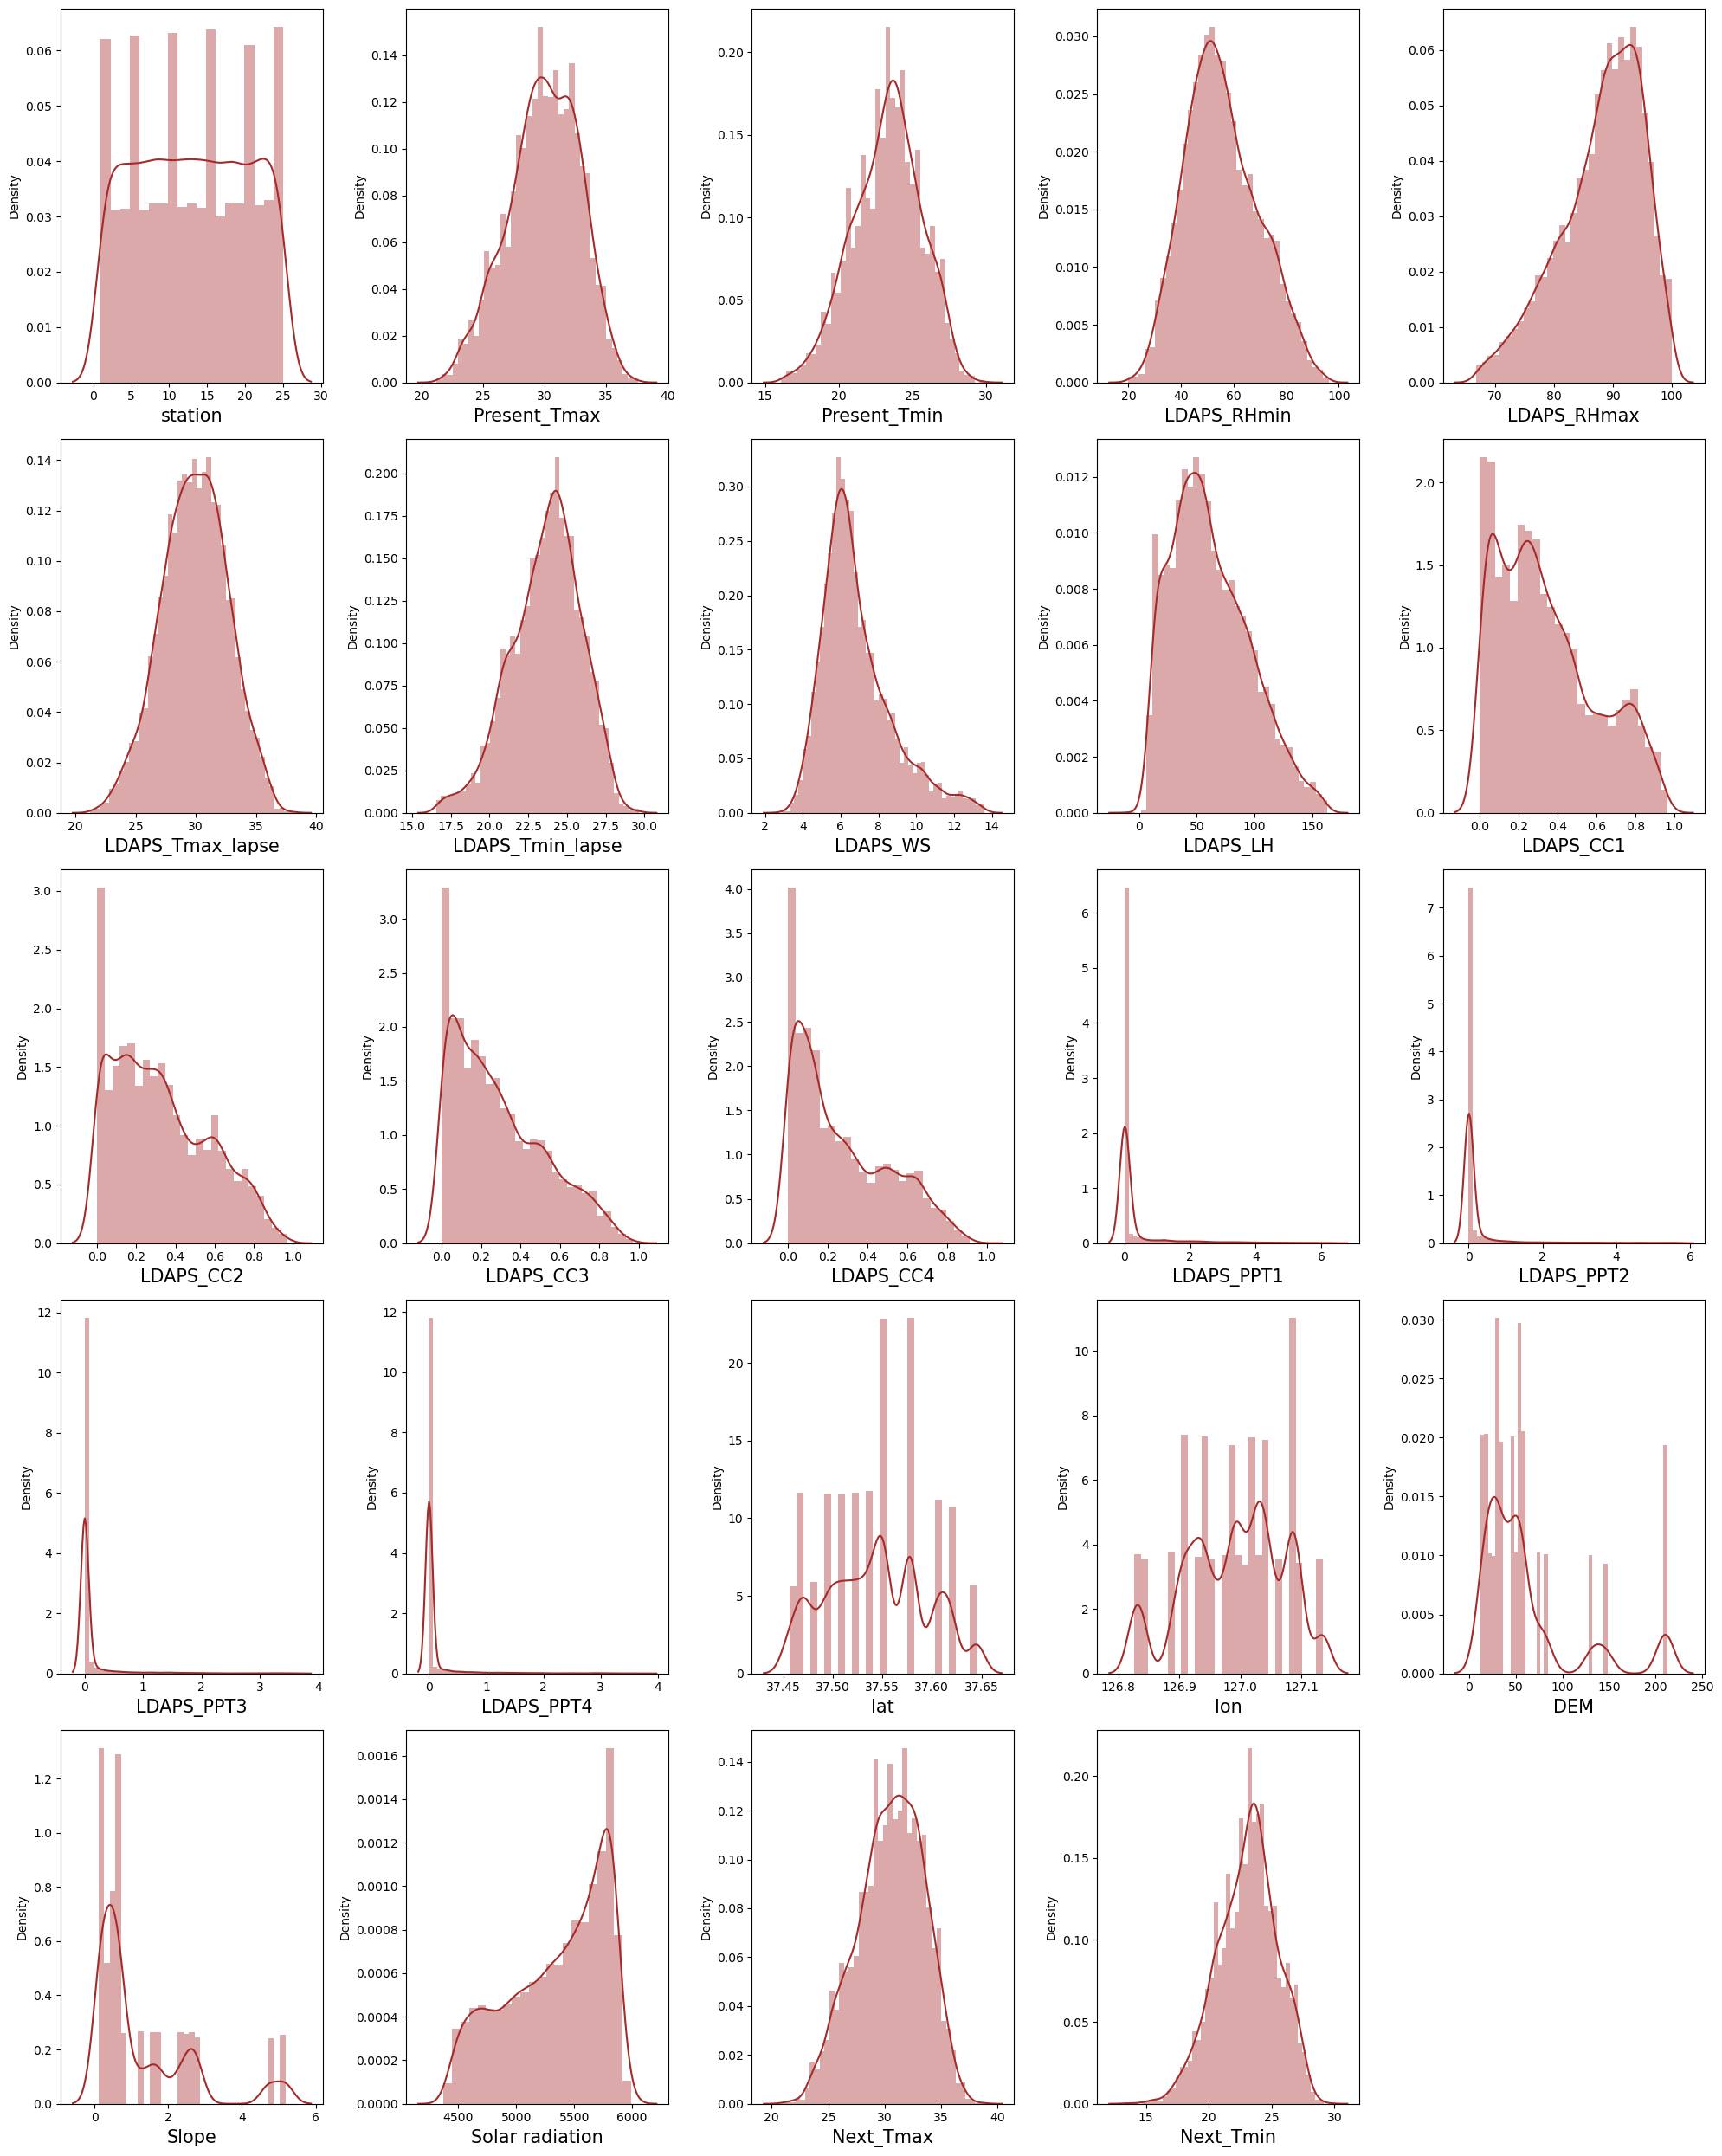

In [135]:
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=25:
        plt.subplot(5,5,p)
        sns.distplot(df[i],color='brown')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

From the above boxplot chart we can see that there were huge outliers present in the columns :LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, and now also we can see that these four much are having extreme skewness, so we can conclude that there is no proper analysis done on these columns, so lets drop these 4 columns.

In [136]:
df.drop(['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],axis=1,inplace=True)
df    

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
30-06-2013,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
30-06-2013,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
30-06-2013,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
30-06-2013,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-08-2017,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
30-08-2017,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
30-08-2017,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1


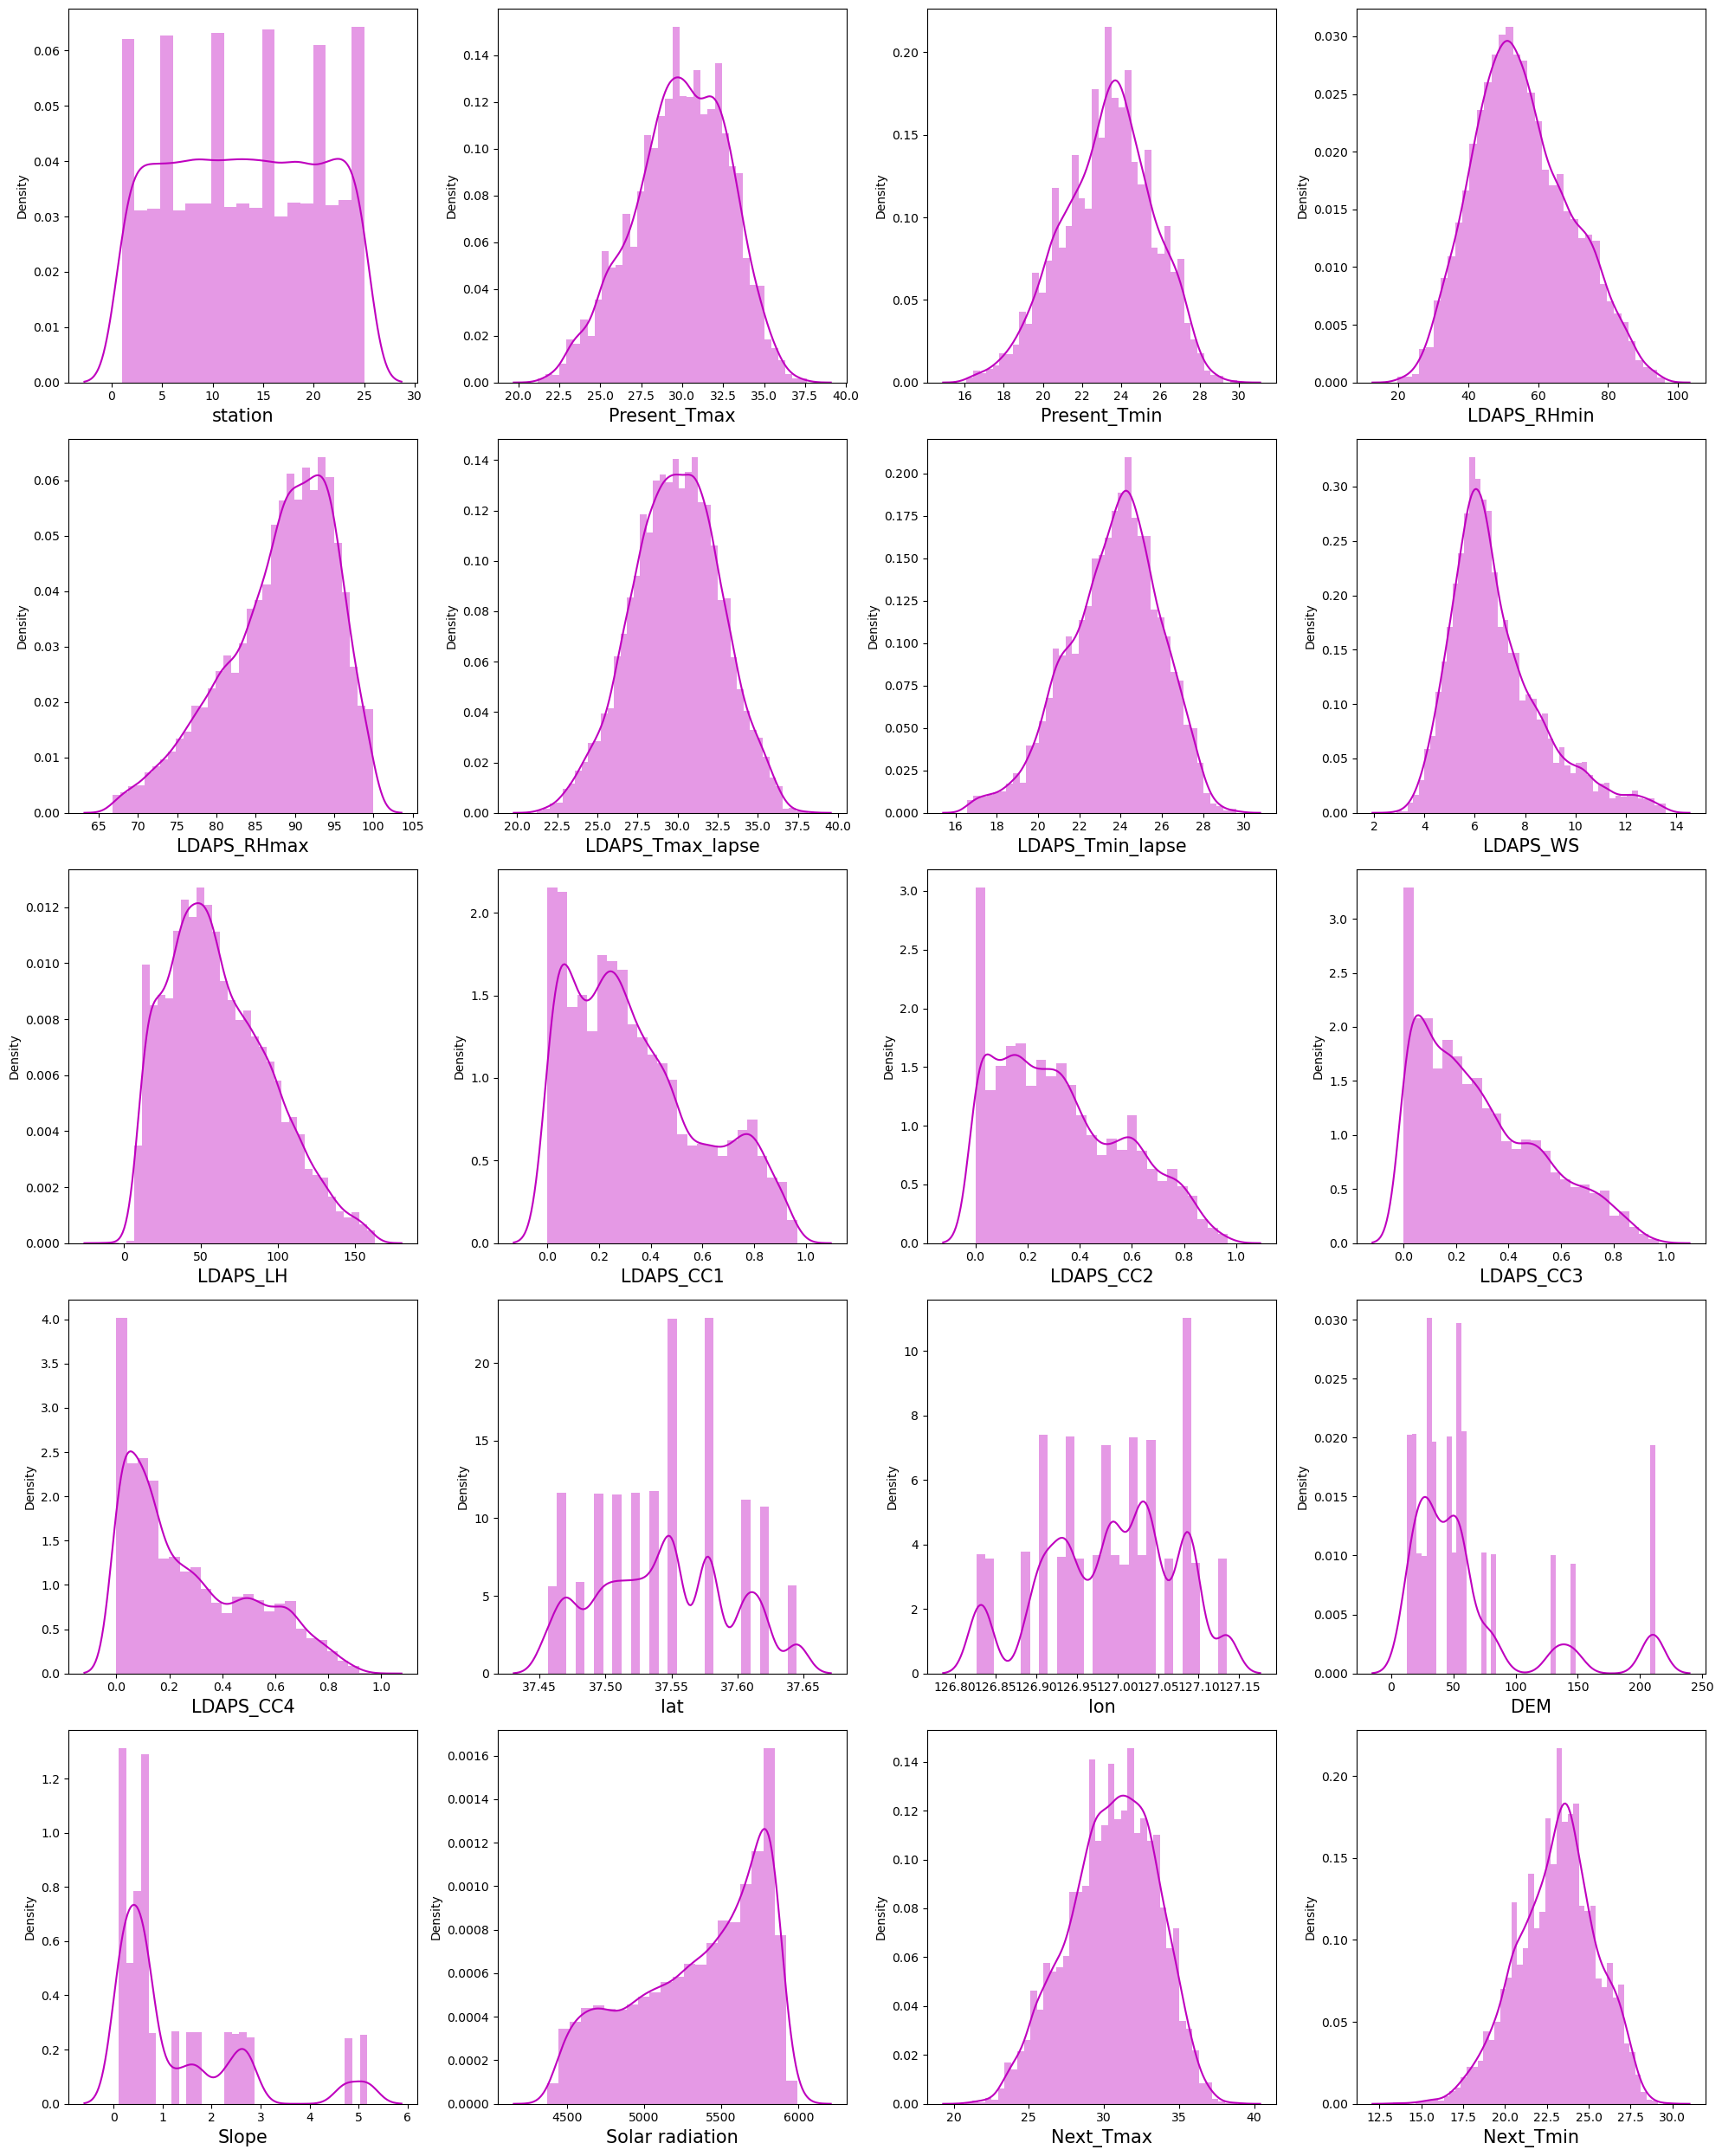

In [137]:
#Lets visualize again
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=20:
        plt.subplot(5,4,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

In [138]:
#Removing the skewness
from scipy.stats import boxcox
skewed=df[['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','lon','DEM','Slope',
          'Solar radiation']]
for i in skewed:
    df[i]=boxcox(df[i],0)
df.skew()

station            -0.002155
Present_Tmax       -0.272176
Present_Tmin       -0.228280
LDAPS_RHmin         0.310510
LDAPS_RHmax        -0.866902
LDAPS_Tmax_lapse   -0.108972
LDAPS_Tmin_lapse   -0.393491
LDAPS_WS            0.382333
LDAPS_LH           -0.656775
LDAPS_CC1                NaN
LDAPS_CC2                NaN
LDAPS_CC3                NaN
LDAPS_CC4                NaN
lat                 0.104976
lon                -0.279432
DEM                 0.415670
Slope               0.066298
Solar radiation    -0.616474
Next_Tmax          -0.267742
Next_Tmin          -0.290919
dtype: float64

We can see some columns are having NaN values. Lets drop them and proceed further.

In [139]:
df.drop(['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'],axis=1,inplace=True)
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,4.512137,28.074101,23.006936,1.919696,4.240633,37.6046,4.844116,5.358165,1.024248,8.698330,29.1,21.2
30-06-2013,2.0,31.9,21.6,52.263397,4.506506,29.850689,24.035009,1.739042,3.950040,37.6046,4.844439,3.801369,-0.665337,8.677493,30.5,22.5
30-06-2013,3.0,31.6,23.3,48.690479,4.430502,30.091292,24.565633,1.814535,3.023982,37.5776,4.844644,3.505762,-1.323883,8.676511,31.1,23.9
30-06-2013,4.0,32.0,23.4,58.239788,4.569374,29.704629,23.326177,1.731664,4.185512,37.6450,4.844360,3.822448,0.930115,8.675387,31.7,24.3
30-06-2013,5.0,31.4,21.9,56.174095,4.501532,29.113934,23.486480,1.746589,4.681812,37.5507,4.845250,3.556433,-0.682207,8.675828,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30-08-2017,21.0,23.1,17.8,24.688997,4.360054,27.812697,18.303014,1.887562,2.263228,37.5507,4.844502,3.269493,-0.558441,8.402012,27.6,17.7
30-08-2017,22.0,22.5,17.4,30.094858,4.427120,26.704905,17.814038,1.752340,4.408507,37.5102,4.844864,3.089532,-2.015904,8.398816,28.0,17.1
30-08-2017,23.0,23.3,17.1,26.741310,4.367799,26.352081,18.775678,1.816276,4.277475,37.5372,4.843328,2.746476,-1.861753,8.399156,28.3,18.1


In [140]:
#checking for any NaN value present in dataset
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

As we can see there is 1 null value present in the dataset. Lets remove it and proceed further

In [141]:
df.dropna(inplace=True)

In [142]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.111066,0.134369,-0.069732,-0.173086,0.067779,0.104811,0.026424,-0.132686,-0.241482,-0.122203,-0.313642,-0.142571,-0.031493,0.107408,0.128798
Present_Tmax,0.111066,1.000000,0.611981,-0.151534,-0.285311,0.541460,0.617806,-0.087119,0.099315,-0.051541,0.010537,-0.142917,-0.092650,-0.045584,0.587683,0.614960
Present_Tmin,0.134369,0.611981,1.000000,0.154689,-0.030792,0.443499,0.766258,0.026069,-0.018895,-0.072578,-0.044521,-0.246342,-0.164922,0.042275,0.441052,0.786725
LDAPS_RHmin,-0.069732,-0.151534,0.154689,1.000000,0.546170,-0.552075,0.133904,0.195367,0.039837,0.089343,-0.094904,0.066354,0.070228,0.257584,-0.430557,0.140346
LDAPS_RHmax,-0.173086,-0.285311,-0.030792,0.546170,1.000000,-0.374956,-0.129537,0.056971,0.319568,0.190603,0.020394,0.162993,0.168533,0.153752,-0.290399,-0.085031
LDAPS_Tmax_lapse,0.067779,0.541460,0.443499,-0.552075,-0.374956,1.000000,0.621699,-0.184284,-0.035852,-0.038327,0.105354,-0.127104,-0.095643,0.029028,0.817223,0.552961
LDAPS_Tmin_lapse,0.104811,0.617806,0.766258,0.133904,-0.129537,0.621699,1.000000,-0.028961,-0.149127,-0.090748,-0.026384,-0.178503,-0.153874,0.130604,0.547873,0.876571
LDAPS_WS,0.026424,-0.087119,0.026069,0.195367,0.056971,-0.184284,-0.028961,1.000000,-0.043677,-0.022549,-0.077412,0.123899,0.100028,0.137226,-0.235547,0.006598
LDAPS_LH,-0.132686,0.099315,-0.018895,0.039837,0.319568,-0.035852,-0.149127,-0.043677,1.000000,0.076810,-0.003235,0.104781,0.068513,-0.026424,0.113616,-0.065097
lat,-0.241482,-0.051541,-0.072578,0.089343,0.190603,-0.038327,-0.090748,-0.022549,0.076810,1.000000,0.287584,0.033233,0.098084,0.048055,-0.049298,-0.077211


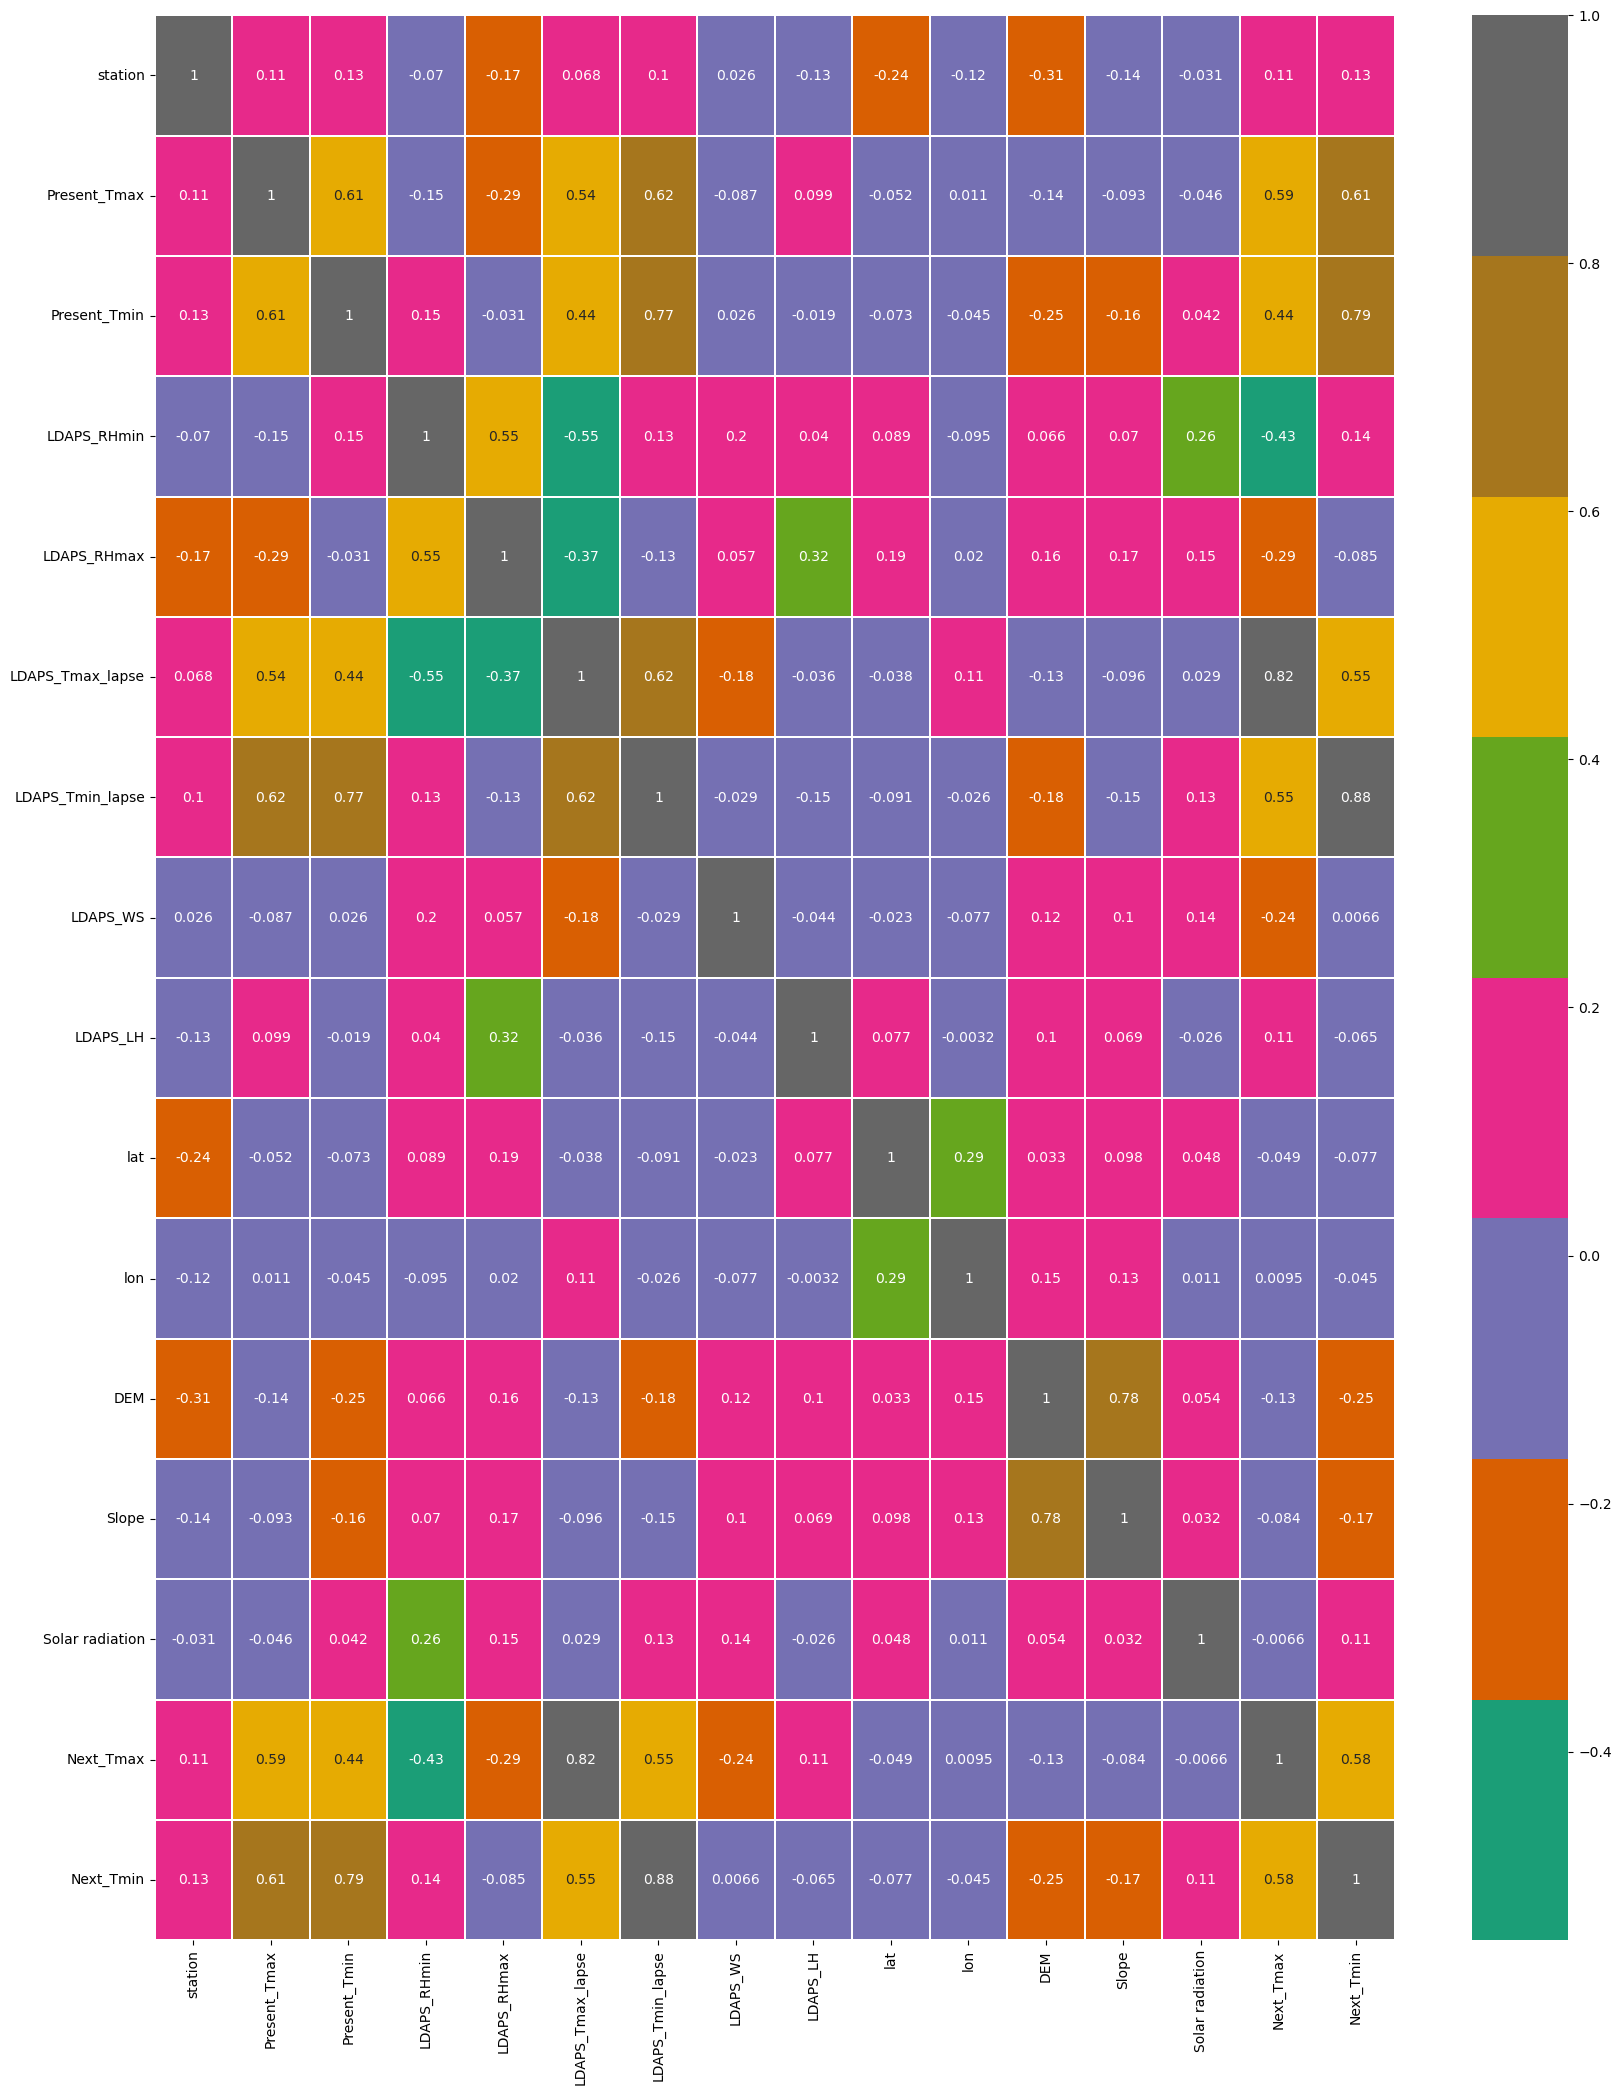

In [143]:
#Visualizing Correlation
plt.figure (figsize=(20,25))
sns.heatmap(df.corr(),annot=True,cmap='Dark2',linewidth=0.3)
plt.show()

In [144]:
#Separating feature and target variable
x=df.iloc[:,0:-2]
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation
Date,,,,,,,,,,,,,,
30-06-2013,1.0,28.7,21.4,58.255688,4.512137,28.074101,23.006936,1.919696,4.240633,37.6046,4.844116,5.358165,1.024248,8.698330
30-06-2013,2.0,31.9,21.6,52.263397,4.506506,29.850689,24.035009,1.739042,3.950040,37.6046,4.844439,3.801369,-0.665337,8.677493
30-06-2013,3.0,31.6,23.3,48.690479,4.430502,30.091292,24.565633,1.814535,3.023982,37.5776,4.844644,3.505762,-1.323883,8.676511
30-06-2013,4.0,32.0,23.4,58.239788,4.569374,29.704629,23.326177,1.731664,4.185512,37.6450,4.844360,3.822448,0.930115,8.675387
30-06-2013,5.0,31.4,21.9,56.174095,4.501532,29.113934,23.486480,1.746589,4.681812,37.5507,4.845250,3.556433,-0.682207,8.675828


In [145]:
y1=df[['Next_Tmin']]
y1.head()

,Next_Tmin
Date,
30-06-2013,21.2
30-06-2013,22.5
30-06-2013,23.9
30-06-2013,24.3
30-06-2013,22.5


In [146]:
y2=df[['Next_Tmax']]
y2.head()

,Next_Tmax
Date,
30-06-2013,29.1
30-06-2013,30.5
30-06-2013,31.1
30-06-2013,31.7
30-06-2013,31.2


# Scaling

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
#Feature Scaling
st=StandardScaler()
xf=st.fit_transform(x)
xf

array([[-1.67259023, -0.42283008, -0.80775262, ...,  2.07275381,
         1.24530936,  1.45891053],
       [-1.53379877,  0.69134864, -0.72138338, ..., -0.0197617 ,
        -0.2705494 ,  1.20159638],
       [-1.39500731,  0.58689438,  0.01275517, ..., -0.41709172,
        -0.86138203,  1.18947833],
       ...,
       [ 1.38082185, -2.30300666, -2.6646913 , ..., -1.43766005,
        -1.34394691, -2.23551822],
       [ 1.5196133 , -2.30300666, -2.40558357, ..., -1.29790369,
        -1.02273442, -2.24925618],
       [ 1.65840476, -2.33782475, -2.53513744, ..., -1.13085533,
        -0.8440189 , -2.21321811]])

In [149]:
x=pd.DataFrame(data=xf,columns=x.columns)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation
0,-1.672590,-0.422830,-0.807753,0.198360,0.457285,-0.660502,-0.283387,0.107874,0.453113,1.209642,0.002285,2.072754,1.245309,1.458911
1,-1.533799,0.691349,-0.721383,-0.234122,0.388699,-0.014896,0.175285,-0.605714,-0.007271,1.209642,0.518025,-0.019762,-0.270549,1.201596
2,-1.395007,0.586894,0.012755,-0.491990,-0.537021,0.072538,0.412022,-0.307514,-1.474415,0.670536,0.844993,-0.417092,-0.861382,1.189478
3,-1.256216,0.726167,0.055940,0.197213,1.154420,-0.067974,-0.140958,-0.634857,0.365785,2.016305,0.392250,0.008572,1.160855,1.175590
4,-1.117424,0.517258,-0.591830,0.048125,0.328111,-0.282630,-0.069439,-0.575906,1.152068,0.133426,1.812930,-0.348983,-0.285685,1.181044


# Checking Multi-Collineraity

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif=pd.DataFrame()
vif['VIF_values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF_values,Features
0,1.261465,station
1,2.281807,Present_Tmax
2,2.949780,Present_Tmin
3,4.662726,LDAPS_RHmin
4,1.922408,LDAPS_RHmax
5,5.921264,LDAPS_Tmax_lapse
6,6.221800,LDAPS_Tmin_lapse
7,1.110676,LDAPS_WS
8,1.365398,LDAPS_LH
9,1.241824,lat


# Modelling

In [152]:
#Importing necessary library
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Modelling for Y1(Next_Tmin)

In [153]:
#creating train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.33,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(4523, 14)
(2228, 14)
(4523, 1)
(2228, 1)


In [154]:
lr=LinearRegression()
lr.fit(x_train,y1_train)
lr_pred=lr.predict(x_test)
print("R2 score =",r2_score(y1_test,lr_pred))
print("Mean Absolute Error =",mean_absolute_error(y1_test,lr_pred))
print("Mean Squared Error =",mean_squared_error(y1_test,lr_pred))

R2 score = 0.804286817246774
Mean Absolute Error = 0.8003857373349877
Mean Squared Error = 1.0555307238245992


In [155]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y1_train)
rfr_pred=rfr.predict(x_test)
print("R2 score =",r2_score(y1_test,rfr_pred))
print("Mean Absolute Error =",mean_absolute_error(y1_test,rfr_pred))
print("Mean Squared Error =",mean_squared_error(y1_test,rfr_pred))

R2 score = 0.8672503565951991
Mean Absolute Error = 0.6499685816876125
Mean Squared Error = 0.7159524219030526


In [157]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y1_train)
dtr_pred=dtr.predict(x_test)
print("R2 score =",r2_score(y1_test,dtr_pred))
print("Mean Absolute Error =",mean_absolute_error(y1_test,dtr_pred))
print("Mean Squared Error =",mean_squared_error(y1_test,dtr_pred))

R2 score = 0.7065037667055999
Mean Absolute Error = 0.944883303411131
Mean Squared Error = 1.582899461400359


In [158]:
knr.fit(x_train,y1_train)
knr_pred=knr.predict(x_test)
print("R2 score =",r2_score(y1_test,knr_pred))
print("Mean Absolute Error =",mean_absolute_error(y1_test,knr_pred))
print("Mean Squared Error =",mean_squared_error(y1_test,knr_pred))

R2 score = 0.7878420446760466
Mean Absolute Error = 0.8316517055655298
Mean Squared Error = 1.1442215439856374


In [159]:
sv=SVR()
sv.fit(x_train,y1_train)
sv_pred=sv.predict(x_test)
print("R2 score =",r2_score(y1_test,sv_pred))
print("Mean Absolute Error =",mean_absolute_error(y1_test,sv_pred))
print("Mean Squared Error =",mean_squared_error(y1_test,sv_pred))

R2 score = 0.851712753035923
Mean Absolute Error = 0.6725943515974139
Mean Squared Error = 0.7997506500076028


# Cross_Validation

In [160]:
from sklearn.model_selection import cross_val_score

In [161]:
rfr_score=cross_val_score(rfr,x,y1)
print(rfr_score)
print(rfr_score.mean())
print("The difference between cv score and r2 score =",(r2_score(y1_test,rfr_pred))-(rfr_score.mean()))

[0.71613829 0.69250023 0.79292559 0.86462836 0.84960823]
0.7831601405758465
The difference between cv score and r2 score = 0.08409021601935263


In [162]:
dtr_score=cross_val_score(dtr,x,y1)
print(dtr_score)
print(dtr_score.mean())
print("The difference between cv score and r2 score =",(r2_score(y1_test,dtr_pred))-(dfr_score.mean()))

[0.4605907  0.53084643 0.59237278 0.74249047 0.68207501]
0.6016750792800295
The difference between cv score and r2 score = 0.07500472590952234


In [163]:
knr_score=cross_val_score(knr,x,y1)
print(knr_score)
print(knr_score.mean())
print("The difference between cv score and r2 score =",(r2_score(y1_test,knr_pred))-(knr_score.mean()))

[0.60687477 0.61766078 0.6898291  0.78145368 0.7808699 ]
0.6953376462249062
The difference between cv score and r2 score = 0.09250439845114033


# Hyper_Parameter Tuning

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
dtr=DecisionTreeRegressor()
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best','random']}
grid=GridSearchCV(estimator=dtr,param_grid=parameters)
grid.fit(x,y1)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

SCORE = 0.6005744891843541
{'criterion': 'friedman_mse', 'splitter': 'best'}


In [166]:
#Applying the hyper parameter tuning on the model
dtr=DecisionTreeRegressor(criterion= 'friedman_mse', splitter= 'best')
dtr.fit(x_train,y1_train)
pred=dtr.predict(x_test)
print("R2 SCORE =",r2_score(y1_test,pred))

R2 SCORE = 0.7098725611944301


In [ ]:
rfr=RandomForestRegressor()
parameters={'n_estimators':[120,130,240],'criterion':['absolute_error','friedman_mse','poisson']}
grid=GridSearchCV(estimator=rfr,param_grid=parameters)
grid.fit(x,y1)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

In [167]:
#Applying the hyper parameter tuning on the model
rfr=RandomForestRegressor(n_estimators=120,criterion='friedman_mse')
rfr.fit(x_train,y1_train)
pred=rfr.predict(x_test)
print("R2 score =",r2_score(y1_test,pred))

R2 score = 0.865874341791481


So we can see there is a increase in accuracy score after applying hyper tuning parameters.

In [168]:
final_model=rfr
final_model

RandomForestRegressor(criterion='friedman_mse', n_estimators=120)

# Saving the best model and predicting the saved model

In [169]:
import joblib
joblib.dump(final_model,"Minimum temp.pkl")

['Minimum temp.pkl']

In [170]:
model=joblib.load("Minimum temp.pkl")
prediction=model.predict(x_test)
prediction

array([25.94166667, 21.31      , 22.46583333, ..., 24.09833333,
       25.02583333, 23.58916667])

In [171]:
actual=np.array(y1_test)
actual.reshape(-1,1)
actual

array([[27.3],
       [20.2],
       [23. ],
       ...,
       [23.8],
       [25.3],
       [23.4]])

# Modelling Y2(Next_Tmax)

In [172]:
#creating train_test_split
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.33,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(4523, 14)
(2228, 14)
(4523, 1)
(2228, 1)


In [173]:
lr=LinearRegression()
lr.fit(x_train,y2_train)
lr_pred=lr.predict(x_test)
print("R2 score =",r2_score(y2_test,lr_pred))
print("Mean Absolute Error =",mean_absolute_error(y2_test,lr_pred))
print("Mean Squared Error =",mean_squared_error(y2_test,lr_pred))

R2 score = 0.7178556124123063
Mean Absolute Error = 1.1617546853410703
Mean Squared Error = 2.357119363016489


In [174]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y2_train)
rfr_pred=rfr.predict(x_test)
print("R2 score =",r2_score(y2_test,rfr_pred))
print("Mean Absolute Error =",mean_absolute_error(y2_test,rfr_pred))
print("Mean Squared Error =",mean_squared_error(y2_test,rfr_pred))

R2 score = 0.8148023188036012
Mean Absolute Error = 0.9185372531418311
Mean Squared Error = 1.5471973200179534


In [175]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y2_train)
dtr_pred=dtr.predict(x_test)
print("R2 score =",r2_score(y2_test,dtr_pred))
print("Mean Absolute Error =",mean_absolute_error(y2_test,dtr_pred))
print("Mean Squared Error =",mean_squared_error(y2_test,dtr_pred))

R2 score = 0.5926361461479586
Mean Absolute Error = 1.3236983842010772
Mean Squared Error = 3.4032405745062833


# Cross_Validation

In [176]:
rfr_score=cross_val_score(rfr,x,y2)
print(rfr_score)
print(rfr_score.mean())
print("The difference between cv score and r2 score is =",(r2_score(y2_test,rfr_pred))-rfr_score.mean())

[0.68163235 0.59614075 0.65040504 0.78958205 0.59682822]
0.6629176827312298
The difference between cv score and r2 score is = 0.15188463607237146


In [177]:
dtr_score=cross_val_score(dtr,x,y2)
print(dtr_score)
print(dtr_score.mean())
print("The difference between cv score and r2 score is =",(r2_score(y2_test,dtr_pred))-dtr_score.mean())

[0.27564559 0.26777916 0.29159985 0.57450623 0.36456889]
0.3548199451616697
The difference between cv score and r2 score is = 0.23781620098628886


# Hyper_Parameter Tuning

In [178]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=rfr
{'n_estimators':[120,130,240],'criterion':['absolute_error','friedman_mse','poisson']}
grid=GridSearchCV(estimator=rfr,param_grid=parameters)
grid.fit(x,y1)
print("SCORE =",grid.best_score_)
print(grid.best_params_)

In [179]:
#Applying the hyper parameter tuning on the model
rfr=RandomForestRegressor(n_estimators=120,criterion='friedman_mse')
rfr.fit(x_train,y1_train)
pred=rfr.predict(x_test)
print("R2 score =",r2_score(y1_test,pred))

R2 score = 0.8652868289033814


In [180]:
final_model=rfr
final_model

RandomForestRegressor(criterion='friedman_mse', n_estimators=120)

# Saving the best model and predicting saved model

In [99]:
import joblib
joblib.dump(final_model,"Maximum Temp.pkl")

['Maximum Temp.pkl']

In [101]:
model=joblib.load("Maximum Temp.pkl")
prediction=model.predict(x_test)
prediction

array([25.86      , 21.32583333, 22.44166667, ..., 24.0525    ,
       24.97666667, 23.77416667])

In [108]:
actual=np.array(y2_test)
actual.reshape(1,-1)

array([[35.1, 29.7, 34.9, ..., 32.7, 35.1, 27.4]])

We can see both are models are performing well.